In [2]:
import numpy as np
from numpy import random as npr
import sympy as sp
from sympy.abc import x, y, z

A = np.array([
    [1, 1, 1], 
    [1, 2, 4], 
    [1, 3, 9]
])

B = np.array([2, 3, 5])

X1 = np.linalg.inv(A) @ B
X2 = np.linalg.solve(A, B)

X_array = [
    x + y + z - 2, 
    x + 2 * y + 4 * z - 3, 
    x + 3 * y + 9 * z - 5
]
X3 = sp.solve(X_array)
X1, X2, X3

(array([ 2. , -0.5,  0.5]), array([ 2. , -0.5,  0.5]), {x: 2, y: -1/2, z: 1/2})

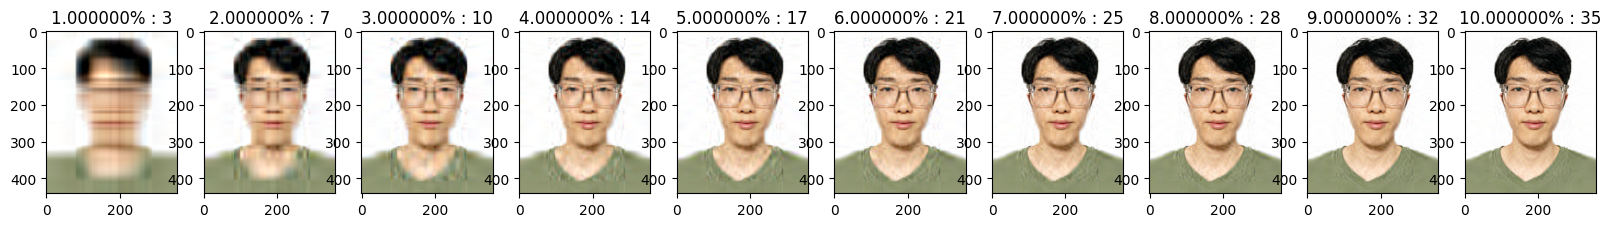

In [30]:
from PIL import Image
img = Image.open('A.jpg', 'r')
import matplotlib.pyplot as plt

# 读取图片，处理 RGB 分量
img = np.array(img)
img_R = img[:, :, 0]
img_G = img[:, :, 1]
img_B = img[:, :, 2]


def svd(data: np.ndarray, r: int) -> np.ndarray:
    """
    对输入数据进行 svd 分解，并保留前 r 维的数据 
    :param data: 原始数据
    :param r: 保留的前 r 维的值
    :return: 
    """
    u, gama, v = np.linalg.svd(data)
    # 奇异值生成对角阵
    gama = np.diag(gama)
    
    # 对 m * n 的数据 data
    # u 保存 m * r
    u = u[:, :r]
    # 奇异值矩阵 保存 r * r
    gama = gama[:r, :r]
    # v 保存 r * n
    v = v[:r, :]
    
    # 计算压缩后的数据
    ret = (u @ gama) @ v
    # 处理不满足要求的色块
    ret[ret < 0] = 0
    ret[ret > 255] = 255
    # 保存为 uint8 类型, 因为 rgb 色值不为 float
    return ret.astype('uint8')


def show(per: float, ax: plt.Subplot):
    """
    在 ax 的位置展示 1 - per% 损失度的图片
    :param per: 
    :param ax: 
    :return: 
    """
    # 计算 per% 所占的图片长度
    width = int(min(img_G.shape[0], img_G.shape[1]) * per)
    # 标题
    ax.set_title("%f%% : %d" % (per * 100, width))
    
    # rgb 分别 svd 分解
    svd_r = svd(img_R, width)
    svd_g = svd(img_G, width)
    svd_b = svd(img_B, width)
    # 重建图片
    image = np.stack((svd_r, svd_g, svd_b), 2)
    image = Image.fromarray(image)
    # Image.fromarray(image).save("{}.jpg".format(width))
    # 在指定位置展示
    ax.imshow(image)

# 生成一个 1 * 10 的绘图列表
fig, axes = plt.subplots(1, 10, figsize=(20, 8)) # type: plt.Figure, plt.Subplot

# 绘图
for i in range(0, 10):
    # 绘制保留 (i + 1)% 的奇异值分解的图像, 在第 i 个位置
    show((i + 1) / 100, axes[i])


In [31]:
A = np.array([
    [1, 5, 7, 6, 1],
    [2, 1, 10, 4, 4],
    [3, 6, 7, 5, 2]
])

np.linalg.svd(A)

(array([[-0.55572489,  0.40548161, -0.72577856],
        [-0.59283199, -0.80531618,  0.00401031],
        [-0.58285511,  0.43249337,  0.68791671]]),
 array([18.53581747,  5.0056557 ,  1.83490648]),
 array([[-0.18828164, -0.37055755, -0.74981208, -0.46504304, -0.22080294],
        [ 0.01844501,  0.76254787, -0.4369731 ,  0.27450785, -0.38971845],
        [ 0.73354812,  0.27392013, -0.12258381, -0.48996859,  0.36301365],
        [ 0.36052404, -0.34595041, -0.43411102,  0.6833004 ,  0.30820273],
        [-0.5441869 ,  0.2940985 , -0.20822387, -0.0375734 ,  0.7567019 ]]))

In [33]:
AAT = A.T @ A
ATA = A @ A.T

ev_u, vector_u = np.linalg.eig(AAT)
ev_v, vector_v = np.linalg.eig(ATA)

vector_u, vector_v

(array([[ 0.18828164,  0.01844501,  0.73354812, -0.05070769, -0.40085358],
        [ 0.37055755,  0.76254787,  0.27392013, -0.09170497,  0.16846103],
        [ 0.74981208, -0.4369731 , -0.12258381, -0.47031607, -0.33575622],
        [ 0.46504304,  0.27450785, -0.48996859,  0.51547495,  0.18222798],
        [ 0.22080294, -0.38971845,  0.36301365,  0.7085953 ,  0.8154741 ]]),
 array([[-0.55572489, -0.72577856,  0.40548161],
        [-0.59283199,  0.00401031, -0.80531618],
        [-0.58285511,  0.68791671,  0.43249337]]))